# ML Project: Bank Marketing Prediction

# Reading file and getting basic information

In [54]:
import pandas as pd
data = pd.read_csv('bank-marketing.csv')
data

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [55]:
#inspecting pdays column of data set
print('Median',data['pdays'].median())
print('NaN values',data['pdays'].isna().sum())
data['pdays'].describe()

Median -1.0
NaN values 0


count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [56]:
#there are fishy values in pdays column in dataset.
#seems there are outliers in pdays column so we prform z score test 
from scipy import stats 
import numpy as np
z = np.abs(stats.zscore(data['pdays']))
print(z)
print(np.where(z>3))

[0.41145311 0.41145311 0.41145311 ... 1.43618859 0.41145311 1.4761376 ]
(array([32111, 32147, 32230, ..., 45177, 45188, 45199], dtype=int64),)


In [57]:
# since we discoverd outliers so we remove them and keep only relevant values 
df = data[(z<3)]

In [58]:
df

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [59]:
print('Median',df['pdays'].median())
print('NaN values',df['pdays'].isna().sum())
df['pdays'].describe()


Median -1.0
NaN values 0


count    43488.000000
mean        26.638797
std         73.270742
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        340.000000
Name: pdays, dtype: float64

In [60]:
#we can observe that mean is reduced from 40 to 26 but there are still many outliers
#We keep this column and will treat it later

# Horizontal graph of medain balance of each education level

Text(0, 0.5, 'Education')

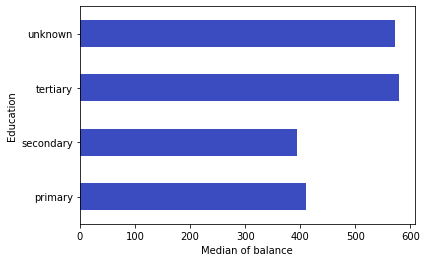

In [61]:
ax = df['balance'].groupby(df['education']).median().plot(kind = 'barh', colormap='coolwarm')
ax.set_xlabel('Median of balance')
ax.set_ylabel('Education')


In [62]:
#We can observe that the median balance for tertiary education is maximum

# Plotting boxplot to check for outliers in pdays

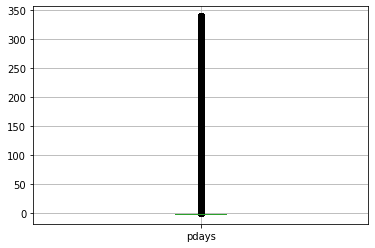

In [63]:
df.boxplot(column= 'pdays')

In [64]:
#there are a lot of outliers in pdays column we will be treating it later on 

# Reading the data and making it compatible for making models

In [65]:
print('Shape of dataframe is ',df.shape)
df.head().T

Shape of dataframe is  (43488, 19)


,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
salary,100000,60000,120000,20000,0
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
targeted,yes,yes,yes,no,no
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no


In [66]:
#Checking for null values
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [67]:
#Describing all the numerical data in transpose form
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,43488.0,41.018051,10.650560,18.0,33.0,39.0,49.0,95.0
salary,43488.0,57222.475166,32096.579482,0.0,20000.0,60000.0,70000.0,120000.0
balance,43488.0,1375.997034,3065.244393,-8019.0,72.0,454.0,1448.0,102127.0
day,43488.0,15.921450,8.392264,1.0,8.0,16.0,22.0,31.0
duration,43488.0,258.637256,258.263740,0.0,103.0,180.0,319.0,4918.0
campaign,43488.0,2.786309,3.138208,1.0,1.0,2.0,3.0,63.0
pdays,43488.0,26.638797,73.270742,-1.0,-1.0,-1.0,-1.0,340.0
previous,43488.0,0.494665,2.205802,0.0,0.0,0.0,0.0,275.0


In [69]:
# Looking for value count of each catagorical data
cat_col = [n for n in df.columns if df[n].dtypes == 'object']
for col in cat_col:
    print('Name of column:',col, '\n')
    print(df[col].value_counts())
    print('----------------------------'*4, '\n')

Name of column: job 

blue-collar      9191
management       9177
technician       7373
admin.           4910
services         3972
retired          2217
self-employed    1541
entrepreneur     1445
unemployed       1264
housemaid        1224
student           890
unknown           284
Name: job, dtype: int64
---------------------------------------------------------------------------------------------------------------- 

Name of column: marital 

married     26301
single      12199
divorced     4988
Name: marital, dtype: int64
---------------------------------------------------------------------------------------------------------------- 

Name of column: education 

secondary    22187
tertiary     12926
primary       6577
unknown       1798
Name: education, dtype: int64
---------------------------------------------------------------------------------------------------------------- 

Name of column: targeted 

yes    35635
no      7853
Name: targeted, dtype: int64
---------------------

In [70]:
#To get rid of warnings 
import warnings 
warnings.filterwarnings('ignore')

In [71]:
#Replacing response column values from yes and no to binary form 1 and 0
df['response'].replace({'no':0,'yes':1}, inplace = True)

Percentage of response as no =  88.46348417954378
Percentage of response as yes =  11.536515820456218


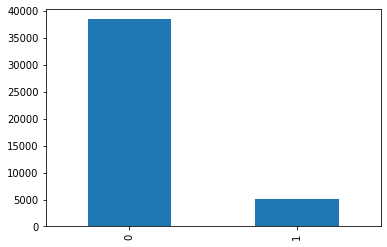

In [72]:
#Let's check the reponse percentage of campaing
res_no = len(df[df['response'] == 0])
res_yes = len(df[df['response'] == 1])
per_res_no = (res_no/ len(df['response']))*100
per_res_yes = (res_yes/ len(df['response']))*100
print('Percentage of response as no = ',per_res_no)
print('Percentage of response as yes = ',per_res_yes)

df['response'].value_counts().plot.bar()

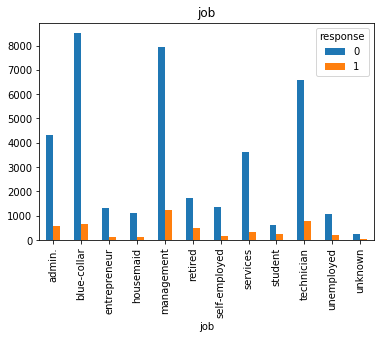

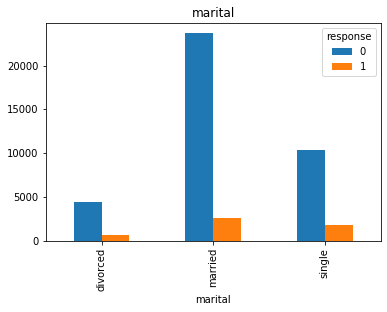

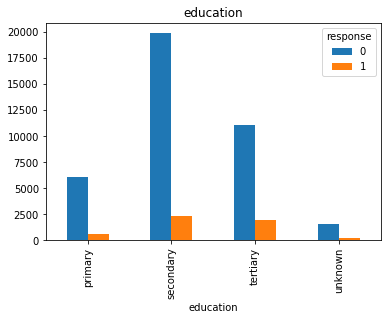

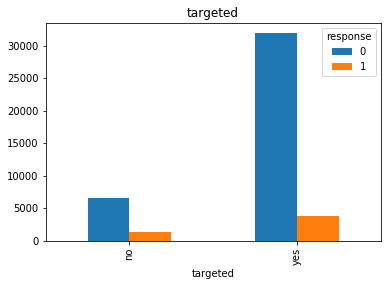

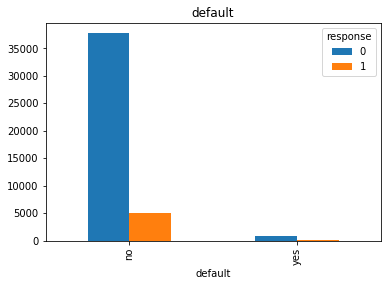

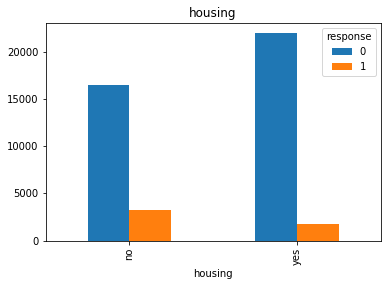

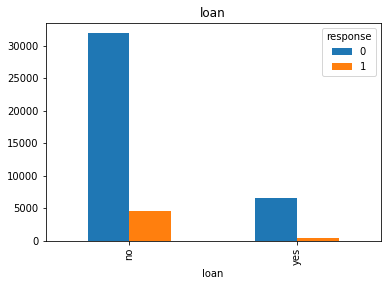

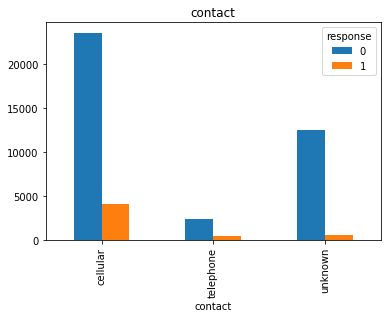

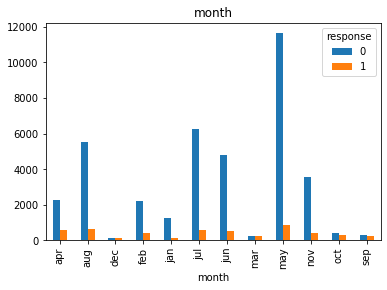

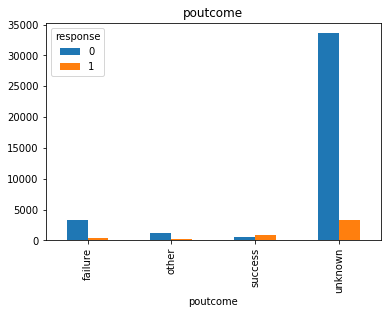

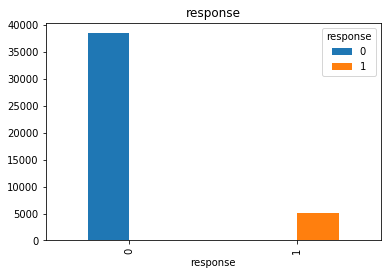

In [74]:
#Printing graphs for all the catagorical values using for loop
#We can get the relation information of all the catagorical columns with response
import pandas as pd
import matplotlib.pyplot as plt
for col in cat_col:
    pd.crosstab(df[col], df['response']).plot(kind='bar')
    plt.title(col)

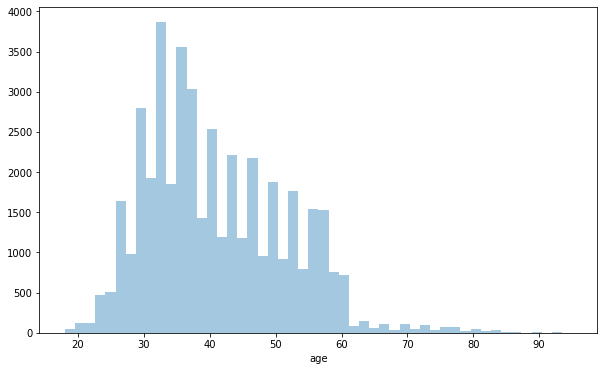

In [75]:
#Checking age distribution of the data
import seaborn as sns
plt.figure(figsize=(10,6))
sns.distplot(a = df['age'], kde = False)

In [76]:
#We observe that most of the users/clients are within age 30-45 and very less above 60

In [77]:
#Getting back to pdays column
#lets take a value count look at pdays column
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 218        1
 3          1
 25         1
 30         1
 32         1
Name: pdays, Length: 338, dtype: int64

In [78]:
#since majority of users are of -1 value of pdays wich means that the person is not contacted before
#so we make new column pdays_no_contact 
df['pdays_no_contact']= (df['pdays']== -1 )*1


In [79]:
# Since columns targeted, default, housing, loan are catogorical and have two values only i.e, yes and no
# We replace all the yes with 1 and no with 0
df.replace({'no':0,'yes':1}, inplace = True)

In [80]:
df #have a look at data now

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,pdays_no_contact
0,58,management,100000,married,tertiary,1,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0,1
1,44,technician,60000,single,secondary,1,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0,1
2,33,entrepreneur,120000,married,secondary,1,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0,1
3,47,blue-collar,20000,married,unknown,0,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0,1
4,33,unknown,0,single,unknown,0,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,1,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1,1
45207,71,retired,55000,divorced,primary,1,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1,1
45208,72,retired,55000,married,secondary,1,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1,0
45209,57,blue-collar,20000,married,secondary,1,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0,1


# P-Value test for dataset

In [82]:
#Checking pvalue for all the numerical data
features_names = ['age','salary','targeted','default','balance','housing','loan','day','duration','campaign','pdays','previous','pdays_no_contact']
target_name = 'response'
X = df[features_names].values
Y = df[target_name].values

In [83]:
#from scipy import stats #(as already imported)
#import numpy as np
import statsmodels.api as sm
mod = sm.OLS(Y,X)
fit = mod.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.294
Model:                            OLS   Adj. R-squared (uncentered):              0.294
Method:                 Least Squares   F-statistic:                              1394.
Date:                Thu, 09 Apr 2020   Prob (F-statistic):                        0.00
Time:                        16:18:31   Log-Likelihood:                         -7169.1
No. Observations:               43488   AIC:                                  1.436e+04
Df Residuals:                   43475   BIC:                                  1.448e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0019      0.000     15.884      0.000       0.002       0.002
x2          3.584e-07   4.23e-08      8.473      0.000    2.75e-07    4.41e-07
x3            -0.0112      0.004     -3.087      0.002      -0.018      -0.004
x4            -0.0132      0.010     -1.289      0.197      -0.033       0.007
x5          2.678e-06   4.52e-07      5.919      0.000    1.79e-06    3.56e-06
x6            -0.0713      0.003    -25.283      0.000      -0.077      -0.066
x7            -0.0395      0.004    -10.521      0.000      -0.047      -0.032
x8             0.0008      0.000      5.008      0.000       0.000       0.001
x9             0.0005   5.27e-06     95.908      0.000       0.000       0.001
x10           -0.0017      0.000     -3.791      0.000      -0.003      -0.001
x11         4.707e-05   3.19e-05      1.473      0.141   -1.55e-05       0.000
x12            0.0054      0.001      7.458      0.000       0.004       0.007
x13           -0.0926      0.006    -15.290      0.000      -0.105      -0.081
==============================================================================
Omnibus:                    14112.110   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44645.589
Skew:                           1.680   Prob(JB):                         0.00
Kurtosis:                       6.653   Cond. No.                     4.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
#p value test is not favouring default and pdays column is not good so we drop those columns
df = df.drop(['default','pdays'], axis=1)

# Now we encode other catagorical data using get_dummies

In [87]:
df = pd.get_dummies(df, columns =['job', 'marital','education','contact','month','poutcome'], drop_first=True)

In [88]:
df.shape

(43488, 44)

In [89]:
#Shape of data is increased due to encoding
df #Have a look now....all the catogories have diffrent seperate columns

# Making Logistic Regression Model 

In [90]:
from sklearn.model_selection import train_test_split
x = df.loc[:,df.columns != 'response']
y = df.loc[:,df.columns == 'response']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [91]:
#Getting length of both train and test
print('Length of x_train :', len(x_train), '\nLength of y_train :',len(y_train))
print('Length of x_test :', len(x_test), '\nLength of y_test :',len(y_test))

Length of x_train : 32616 
Length of y_train : 32616
Length of x_test : 10872 
Length of y_test : 10872


In [92]:
# Normalising data using sklearn standardscaler 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [93]:
#Fitting the train and testing the accuracy
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
print('Train Accuracy is:', lr.score(x_train,y_train))
print('Test Accuracy is:', lr.score(x_test,y_test))

Train Accuracy is: 0.9031763551631101
Test Accuracy is: 0.9036975717439294


In [94]:
# Validating using 10 fold cross validaton
from sklearn.model_selection import KFold, cross_val_score
from sklearn import model_selection
results = []
kfold = model_selection.KFold(n_splits=10, random_state=42)
cv_results = model_selection.cross_val_score(lr, x_train, y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
msg = "{}: {}".format('Logistic Regression accuraacy ', cv_results.mean())
print(msg)

Logistic Regression accuraacy : 0.9022873391215998


In [95]:
#lets create confusion matrix to review performace of model
y_pred = lr.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[9399,  237],
       [ 810,  426]], dtype=int64)

In [96]:
#accuracy, pricision and recall of model
from sklearn import metrics
print('Accuracy = ', metrics.accuracy_score (y_test,y_pred))
print('Precision = ', metrics.precision_score (y_test,y_pred))
print('Recall = ', metrics.recall_score (y_test,y_pred))

Accuracy =  0.9036975717439294
Precision =  0.6425339366515838
Recall =  0.3446601941747573


In [97]:
#Feature importance in logistic regression model
from sklearn.feature_selection import RFE
predictors = x_train
selector = RFE(lr, n_features_to_select = 1)
selector = selector.fit(predictors, y_train)
order = selector.ranking_
feature_rank = []
for i in order:
    feature_rank.append(df.columns[i])
    

In [98]:
a= range(43)
for i in a:
    print(order[i],',',feature_rank[i])

43 , poutcome_unknown
19 , job_student
39 , month_oct
35 , month_jun
3 , balance
13 , job_entrepreneur
16 , job_retired
1 , salary
12 , job_blue-collar
41 , poutcome_other
4 , housing
28 , contact_telephone
20 , job_technician
29 , contact_unknown
21 , job_unemployed
32 , month_feb
26 , education_tertiary
22 , job_unknown
18 , job_services
25 , education_secondary
38 , month_nov
42 , poutcome_success
14 , job_housemaid
40 , month_sep
31 , month_dec
24 , marital_single
33 , month_jan
34 , month_jul
2 , targeted
8 , campaign
36 , month_mar
30 , month_aug
11 , pdays_no_contact
7 , duration
17 , job_self-employed
15 , job_management
10 , response
9 , previous
23 , marital_married
27 , education_unknown
37 , month_may
6 , day
5 , loan


# The top three features for logistic regression model are:
1. Salary
2. Target
3. Balance

# Building Random Forest model

In [100]:
# Train test split is already imported above
x1 = df.loc[:,df.columns != 'response']
y1 = df.loc[:,df.columns == 'response']

x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,random_state = 0)    

In [101]:
# Normalising data using sklearn standardscaler
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

In [102]:
#Building Random forest with 50 trees and max_depth = 2
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50 , max_depth=2, random_state=0)
rfc.fit(x1_train,y1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [103]:
#Getting y predicted for random forest model
y1_pred = rfc.predict(x1_test)

In [104]:
# Validating using 10 fold cross validaton
results1 = []
kfold1 = model_selection.KFold(n_splits=10, random_state=42)
cv_results1 = model_selection.cross_val_score(rfc, x1_train, y1_train, cv=kfold, scoring='accuracy')
results1.append(cv_results1)
rf = "{}: {}".format('Random Forest', cv_results1.mean())
print(rf)

Random Forest: 0.884075094793061


In [105]:
#lets create confusion matrix to review performace of this model also
cm1 = confusion_matrix(y1_test,y1_pred)
cm1

array([[9636,    0],
       [1236,    0]], dtype=int64)

In [106]:
# Checking accuracy of model
print('Accuracy = ', metrics.accuracy_score (y1_test,y1_pred))

Accuracy =  0.8863134657836644


In [110]:
# Checking Feature importance for random forest
names = []
for col in df.columns: 
    names.append(col) 
print('Features sorted by their score:')
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names),reverse=True))

Features sorted by their score:
[(0.2698, 'duration'), (0.2345, 'poutcome_other'), (0.0984, 'response'), (0.0758, 'age'), (0.059, 'month_nov'), (0.0538, 'month_jun'), (0.0515, 'previous'), (0.0417, 'poutcome_success'), (0.031, 'housing'), (0.0245, 'contact_telephone'), (0.0211, 'balance'), (0.012, 'month_oct'), (0.0084, 'month_mar'), (0.0038, 'month_aug'), (0.0029, 'education_secondary'), (0.0023, 'marital_married'), (0.0023, 'job_management'), (0.0022, 'job_services'), (0.0019, 'targeted'), (0.001, 'campaign'), (0.0009, 'job_unknown'), (0.0008, 'salary'), (0.0003, 'day'), (0.0001, 'loan'), (0.0, 'pdays_no_contact'), (0.0, 'month_sep'), (0.0, 'month_may'), (0.0, 'month_jul'), (0.0, 'month_jan'), (0.0, 'month_feb'), (0.0, 'month_dec'), (0.0, 'marital_single'), (0.0, 'job_unemployed'), (0.0, 'job_technician'), (0.0, 'job_student'), (0.0, 'job_self-employed'), (0.0, 'job_retired'), (0.0, 'job_housemaid'), (0.0, 'job_entrepreneur'), (0.0, 'job_blue-collar'), (0.0, 'education_unknown'), (0.

# The top 3 important features for Random forest model are:
1. Duration
2. Poutcome (other)
3. age

# Here we can conclude that:
1. Logistic regression have the better accuracy than the Random Forest so we select logistic regression.
2. Logistic Regression also have better performance.
3. Top feature importance of both the models are diffrent. 